# Time series data analysis

In [ ]:
#Importing Libraries
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10,7), 'figure.dpi' : 120})


In [27]:
#Reading the File
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'])

In [28]:
#Displaying top 5 rows
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [80]:
#Visualizing a time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Valuse', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

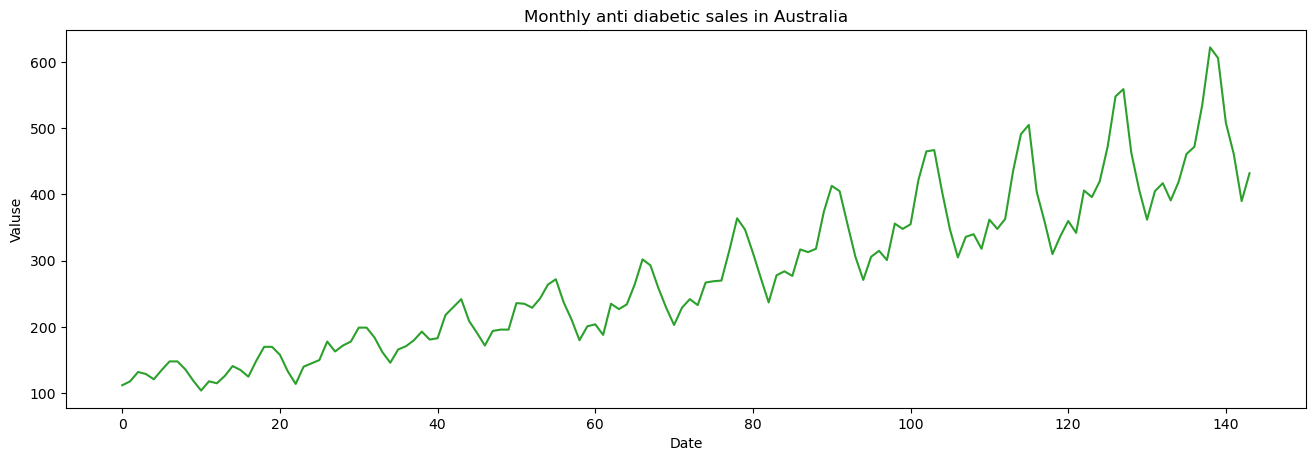

In [81]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti diabetic sales in Australia')

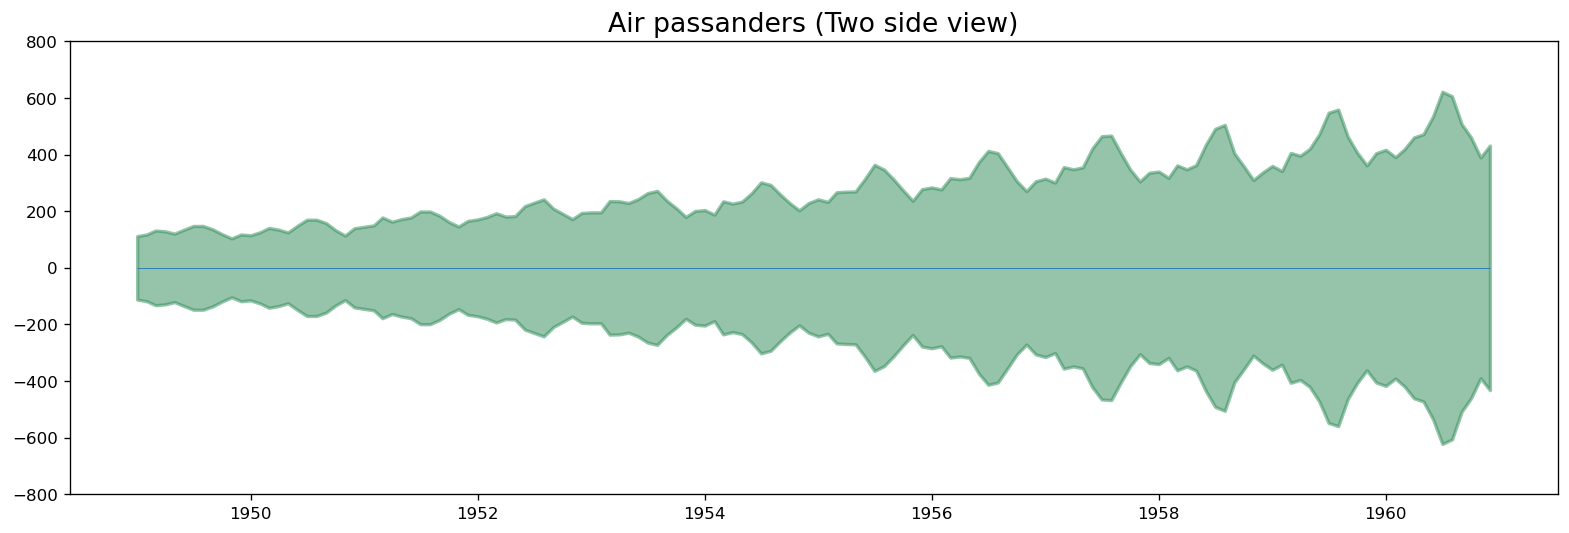

In [77]:
# Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

#Plotting the graph
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi =120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800,800)
plt.title('Air passengers (Two side view)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=0.5)
plt.show()



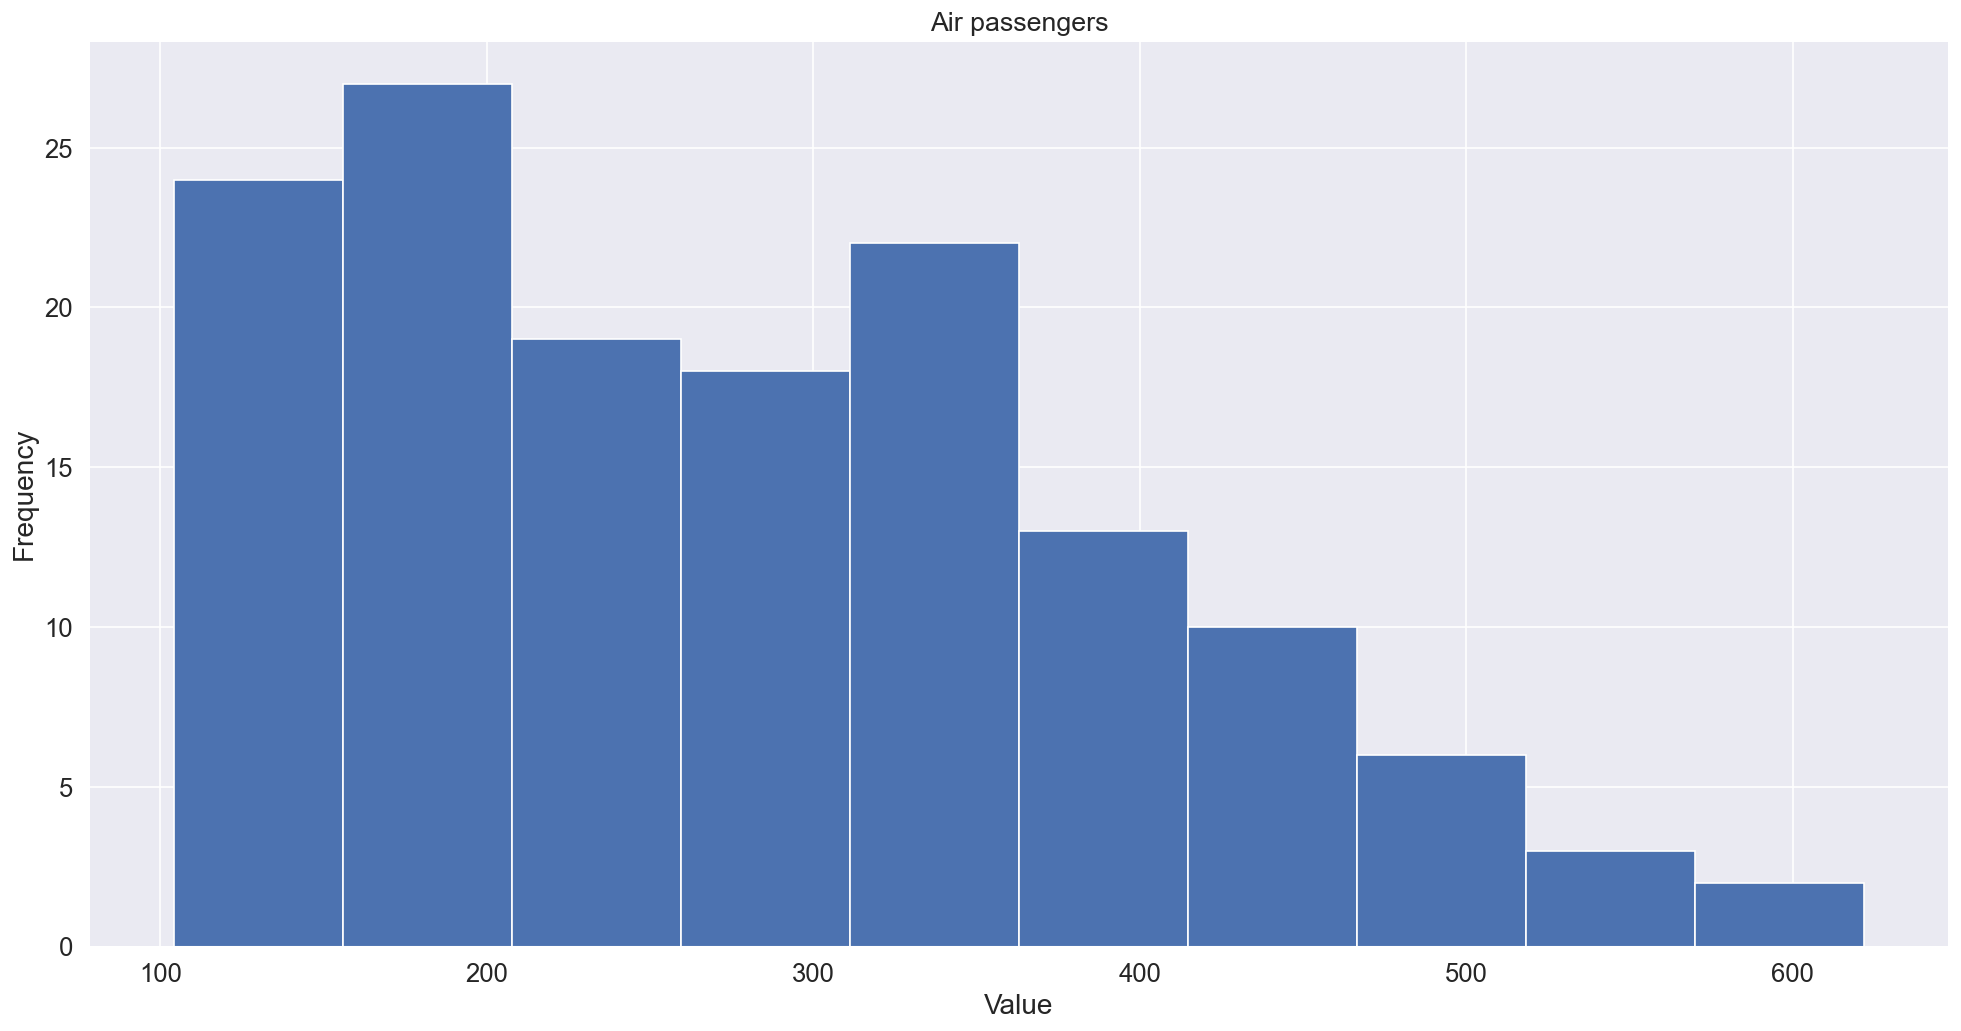

In [170]:
# Visualizing using Histogram (Matplotlib Package)
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv', parse_dates=['date'], index_col='date')

#Plotting the graph using matplotlib
df.hist(figsize=(20,10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram - Air passengers', fontsize=16)
plt.show()


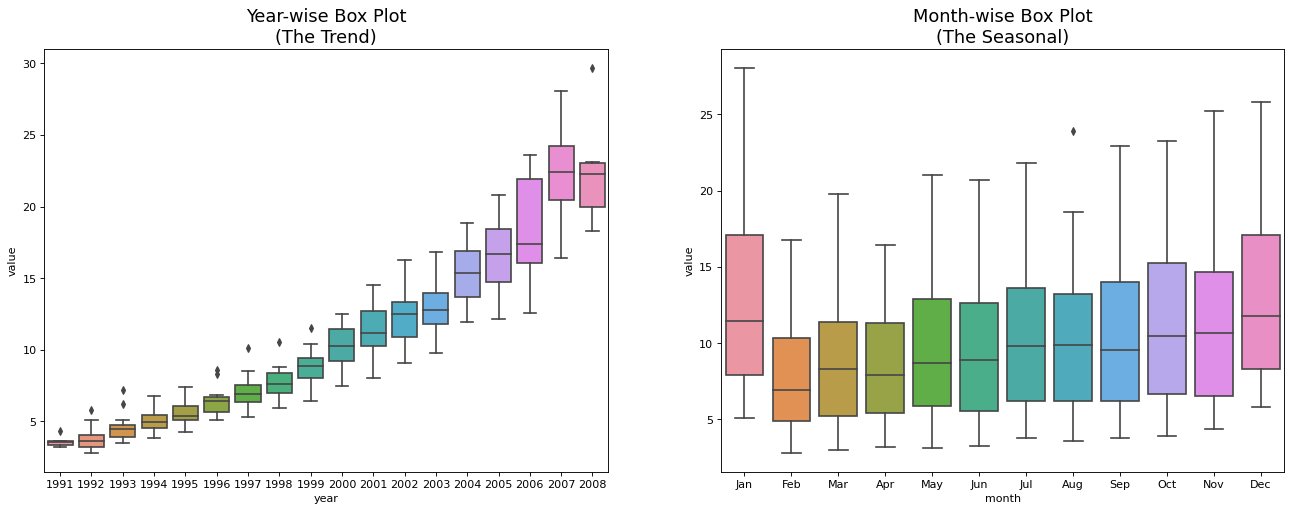

In [114]:
#Boxplot of Month-wise and Year-wise distribution
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#Preparing the data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

#Drawing the plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi = 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991,2008]), :])

#setting the title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=16)
axes[1].set_title('Month-wise Box Plot\n(The Seasonal)', fontsize=16)
plt.show()


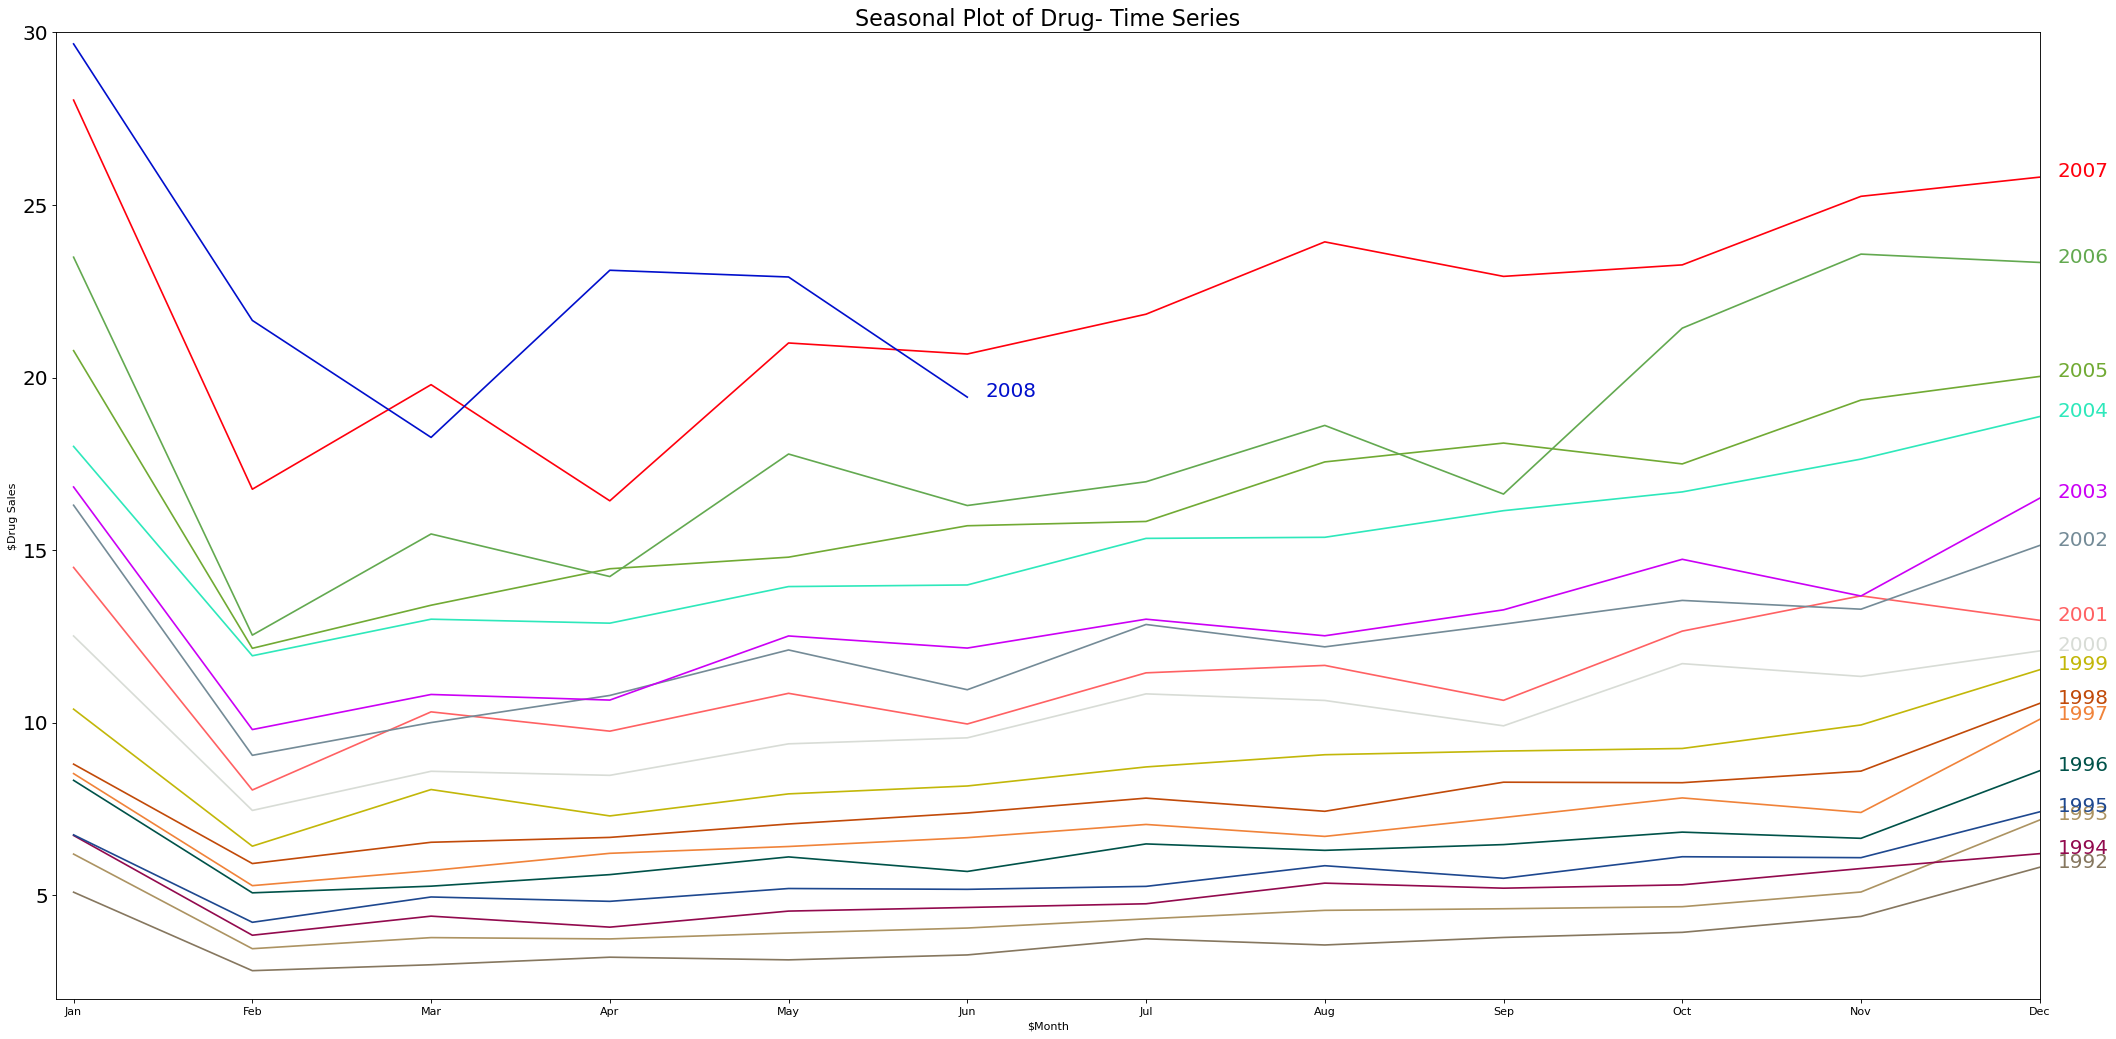

In [109]:
#Seasonal plot of a time series data
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#Preparing the data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

#Preparing the colors
np.random.seed(1000)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#Drawing the plot
plt.figure(figsize=(32,16), dpi=80)
for i, y in enumerate(years):
    if i>0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=18, color=mycolors[i])
        

#Decorating the graph
plt.gca().set(xlim=(-0.1,11), ylim=(2,30), ylabel='$Drug Sales', xlabel='$Month')
plt.yticks(fontsize=18, alpha=1)
plt.title("Seasonal Plot of Drug- Time Series", fontsize=20)
plt.show()


<AxesSubplot:title={'center':'Trend and Seasonality airpassengers'}, xlabel='date'>

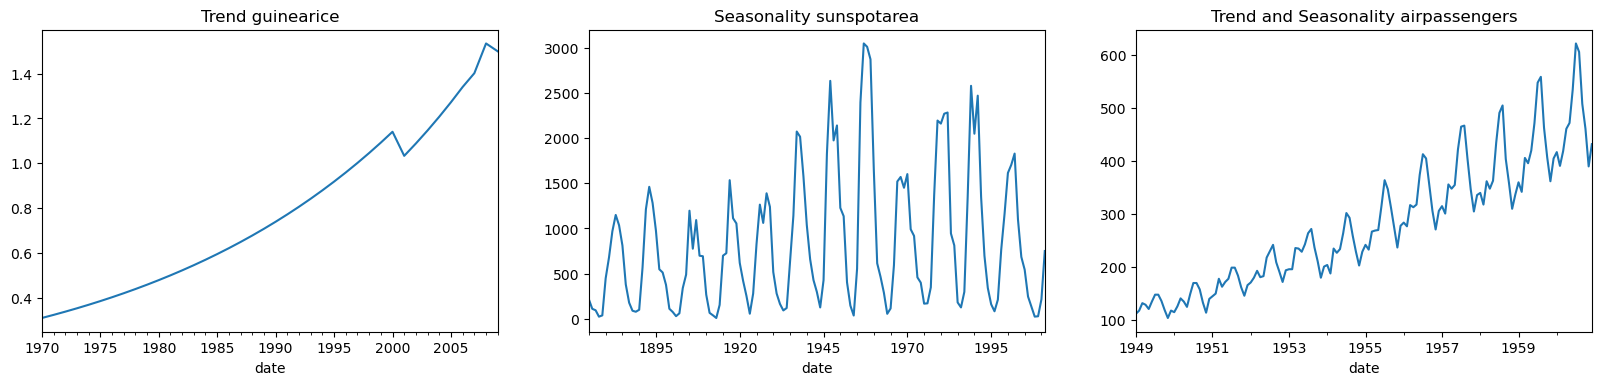

In [117]:
# Patterns in a time series data
#Any time series may be split into : Base level + Trend + Seasonality + Error
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend guinearice', legend=False, ax=axes[0])

pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality sunspotarea', legend=False, ax=axes[1])

pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality airpassengers', legend=False, ax=axes[2])

# Additive and Multiplicative time series 

Based on the nature of trend, seasonality and trend, a time series can be modelled as an additive and multiplicative,
each observation in the time series can be expressed as either a sum or product of the component

Additive Time Series
Value = Base Level + Trend + Seasonality + error

Multiplicative Time Series
Value = Base Level * Trend * Seasonality * Error

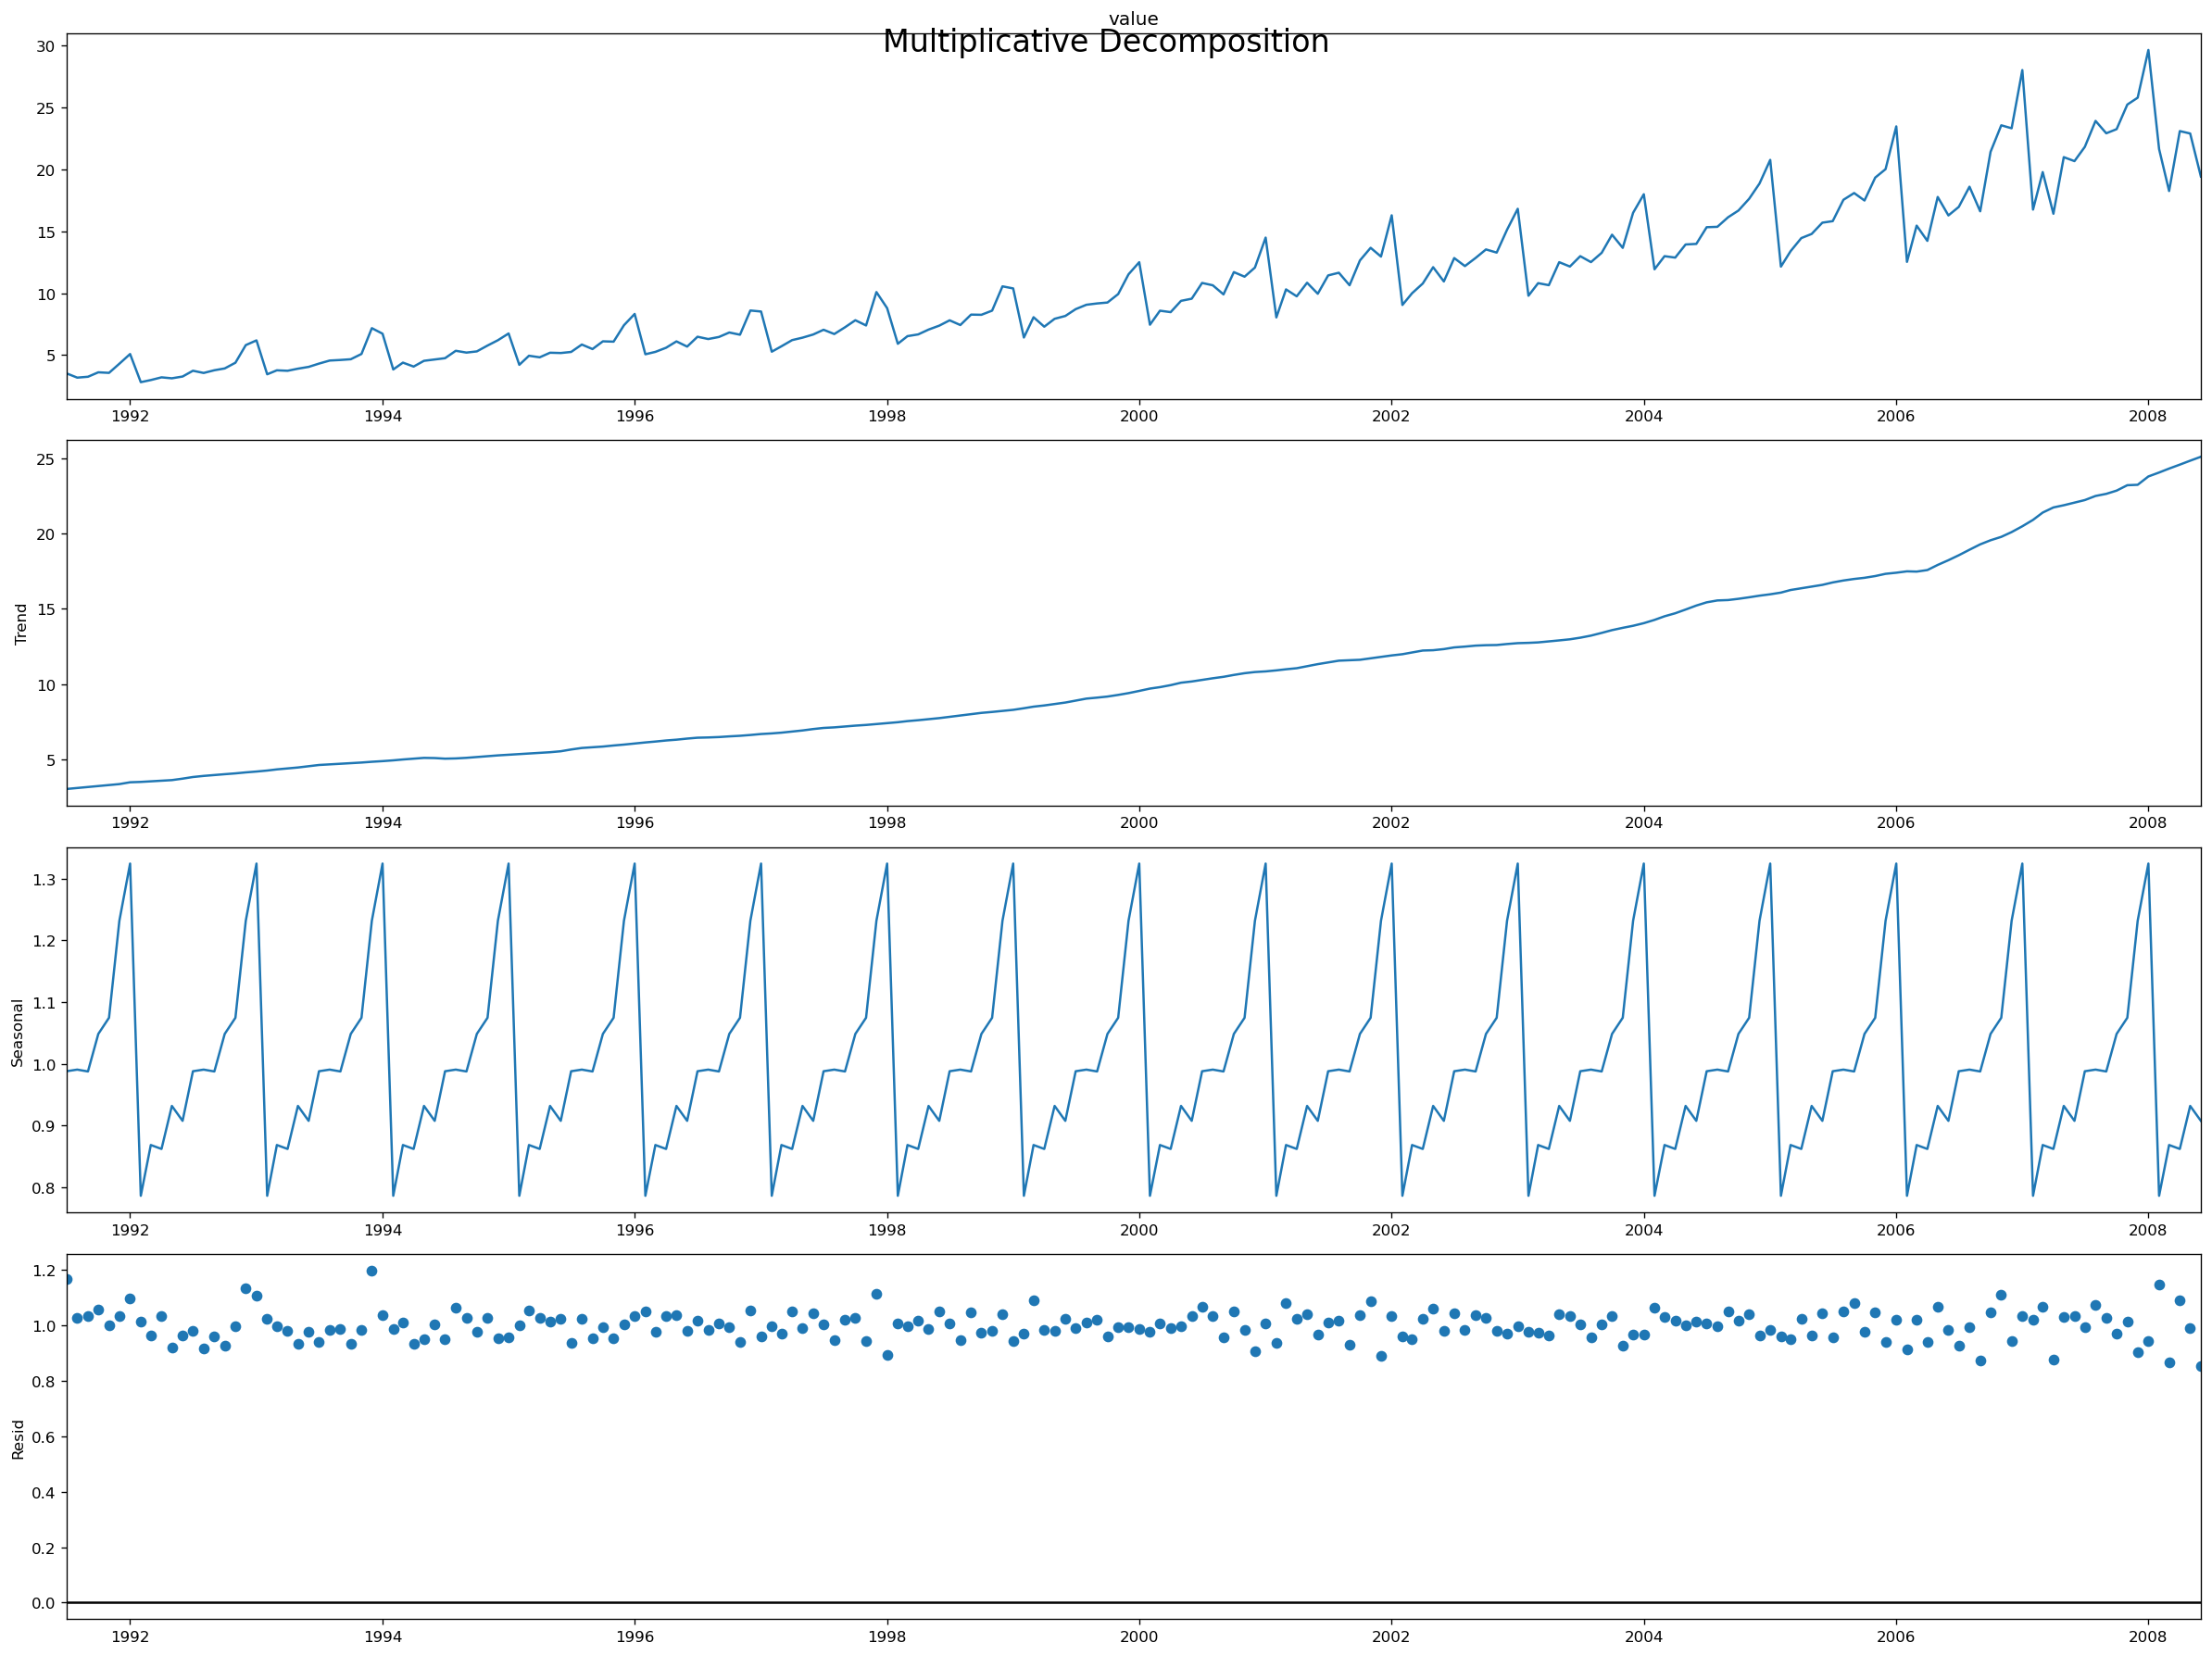

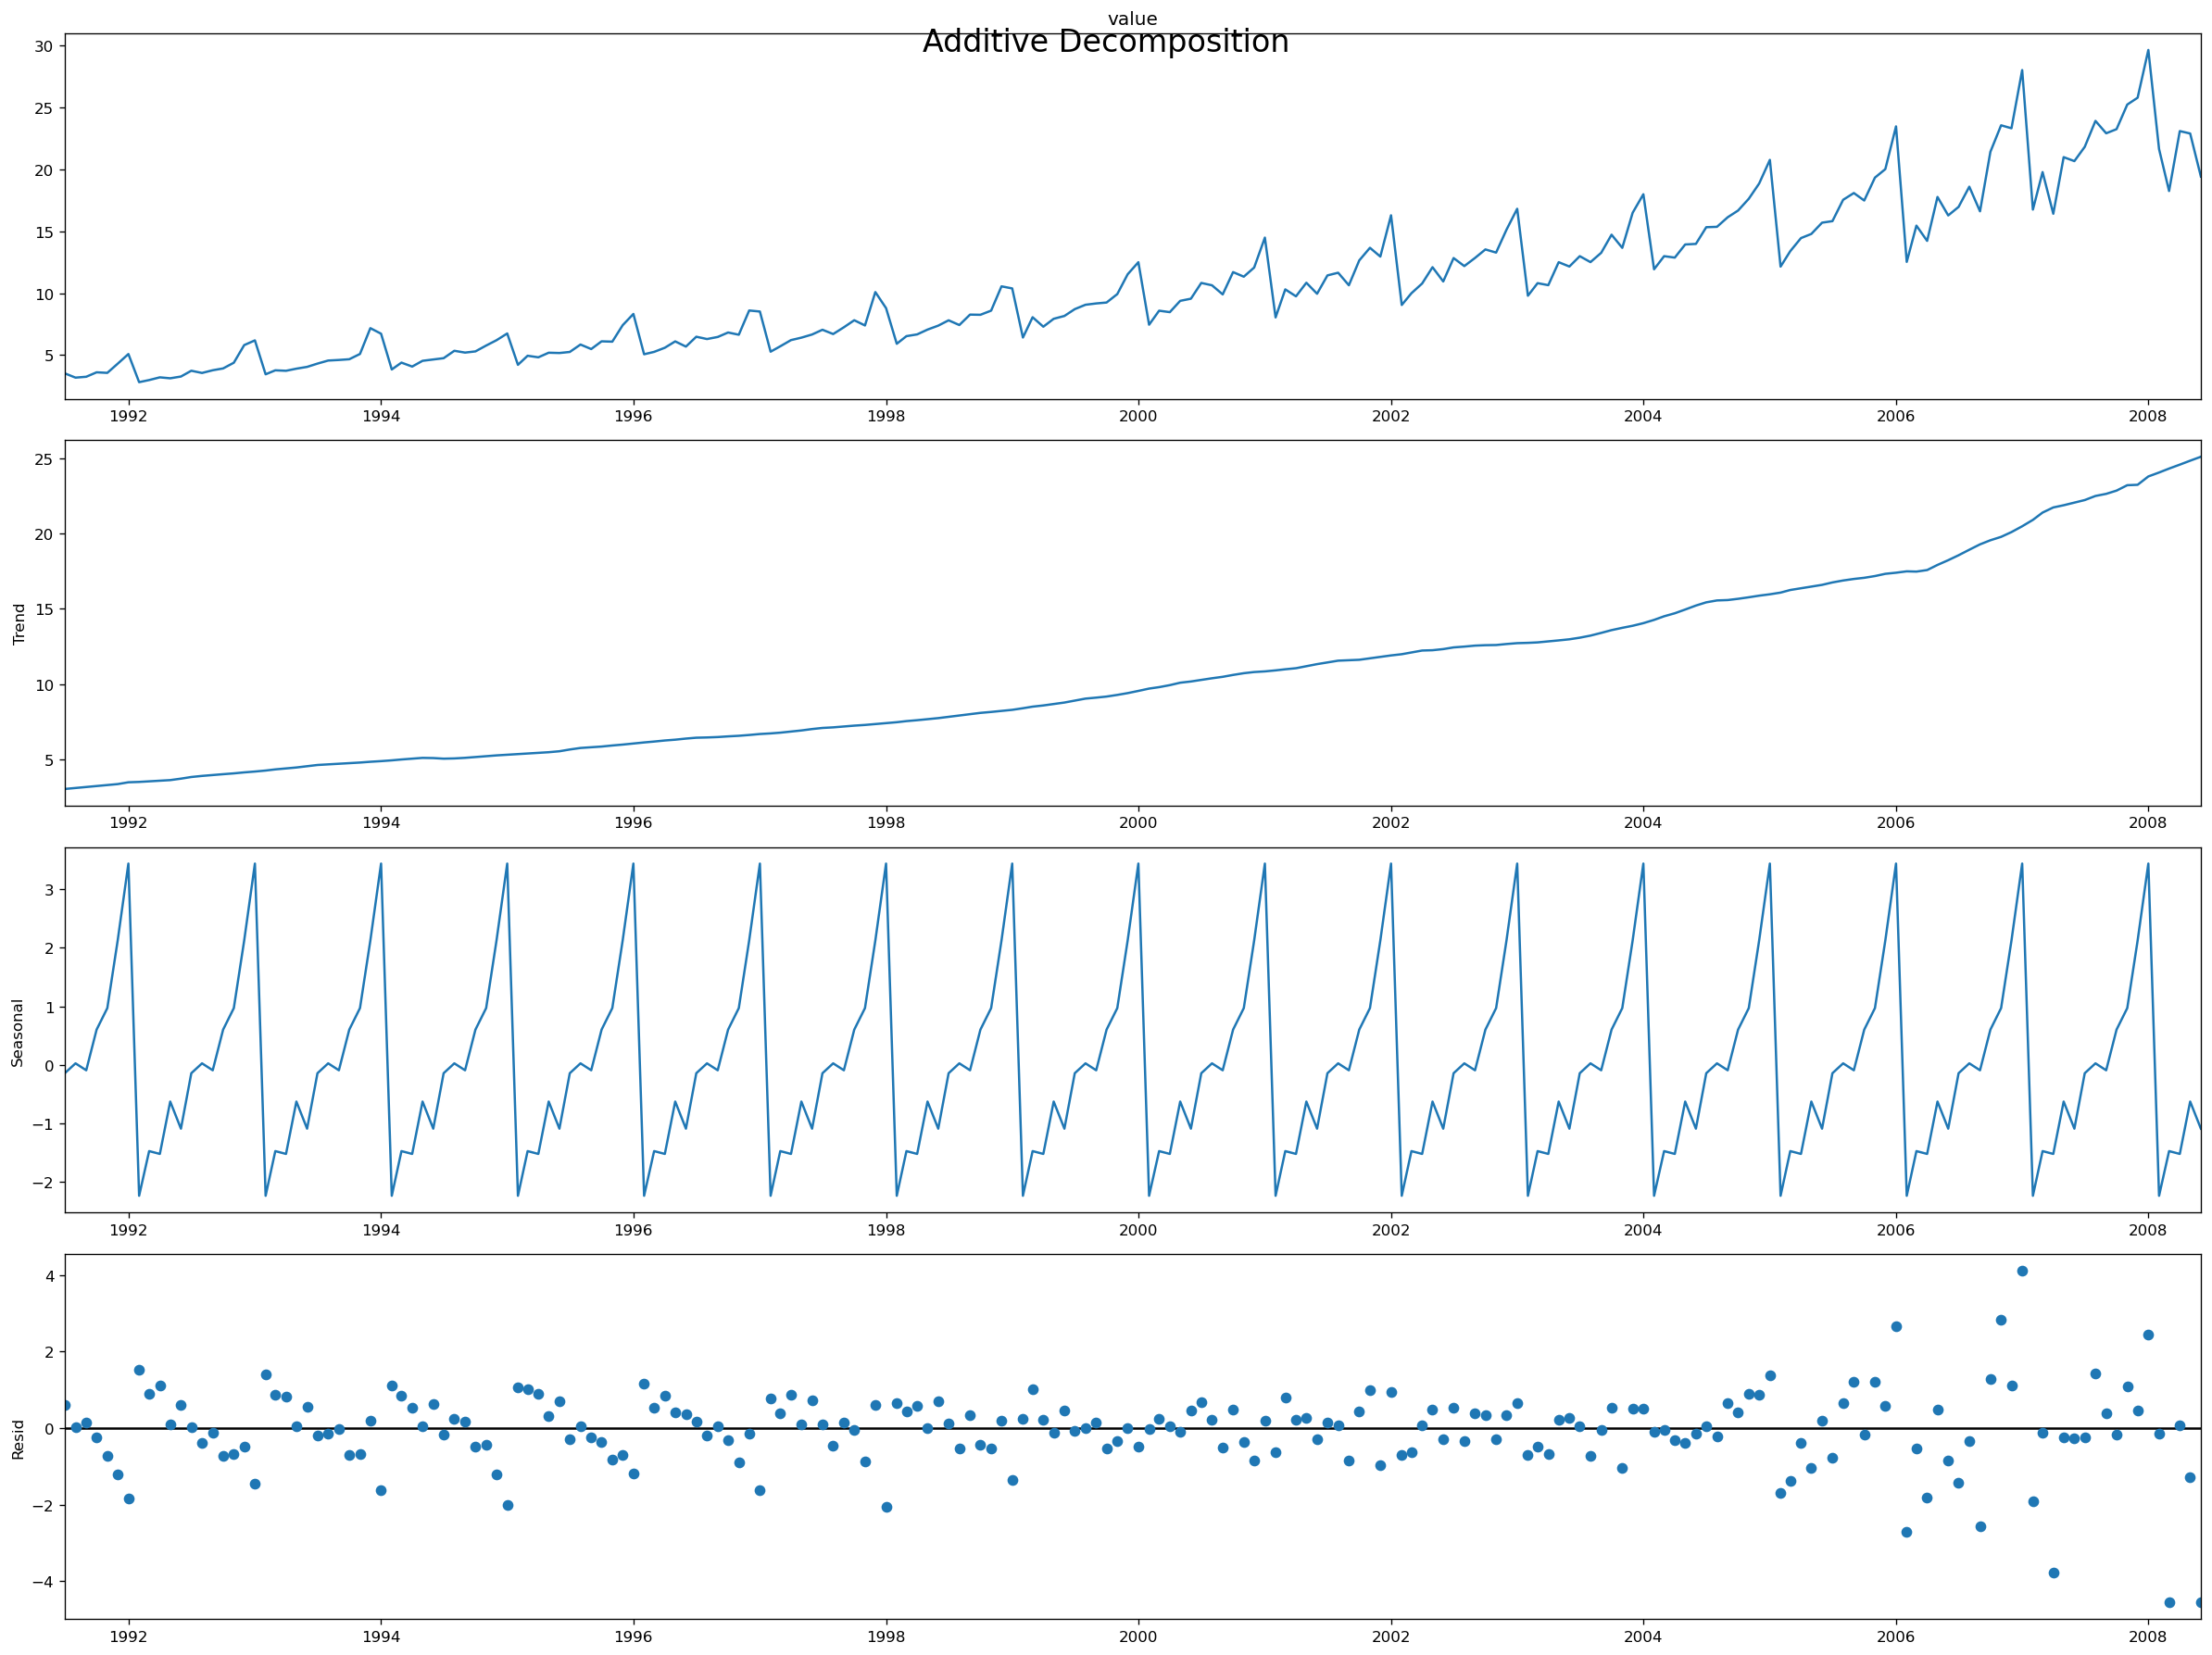

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Importing Data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition for time series data
mul_res = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition for time series data
add_res = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

#Plotting the graph
plt.rcParams.update({'figure.figsize': (20,15)})
mul_res.plot().suptitle('Multiplicative Decomposition', fontsize=20)
add_res.plot().suptitle('Additive Decomposition', fontsize=20)
plt.show()


In [ ]:
"""Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of 
the series."""

In [133]:
# Extracting the components
# Actual valuse = Product of(seasonal * trend * resid)
df_reconstructed = pd.concat([mul_res.seasonal, mul_res.trend, mul_res.resid, mul_res.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_value']
df_reconstructed.head()

,seas,trend,resid,actual_value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [180]:
# How to test Sttionarity?
from statsmodels.tsa.stattools import adfuller, kpss
from dateutil.parser import parse

# Importing Data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'])

#ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Stats: {result[0]}')
print(f'P-Value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')
    
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'{key}, {value}')


ADF Stats: 3.14518568930673
P-Value: 1.0
Critial Values:
1%, -3.465620397124192
Critial Values:
5%, -2.8770397560752436
Critial Values:
10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
10%, 0.347
Critial Values:
5%, 0.463
Critial Values:
2.5%, 0.574
Critial Values:
1%, 0.739


C:\Users\yare01\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yare01\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


<AxesSubplot:title={'center':'Random White Noise'}>

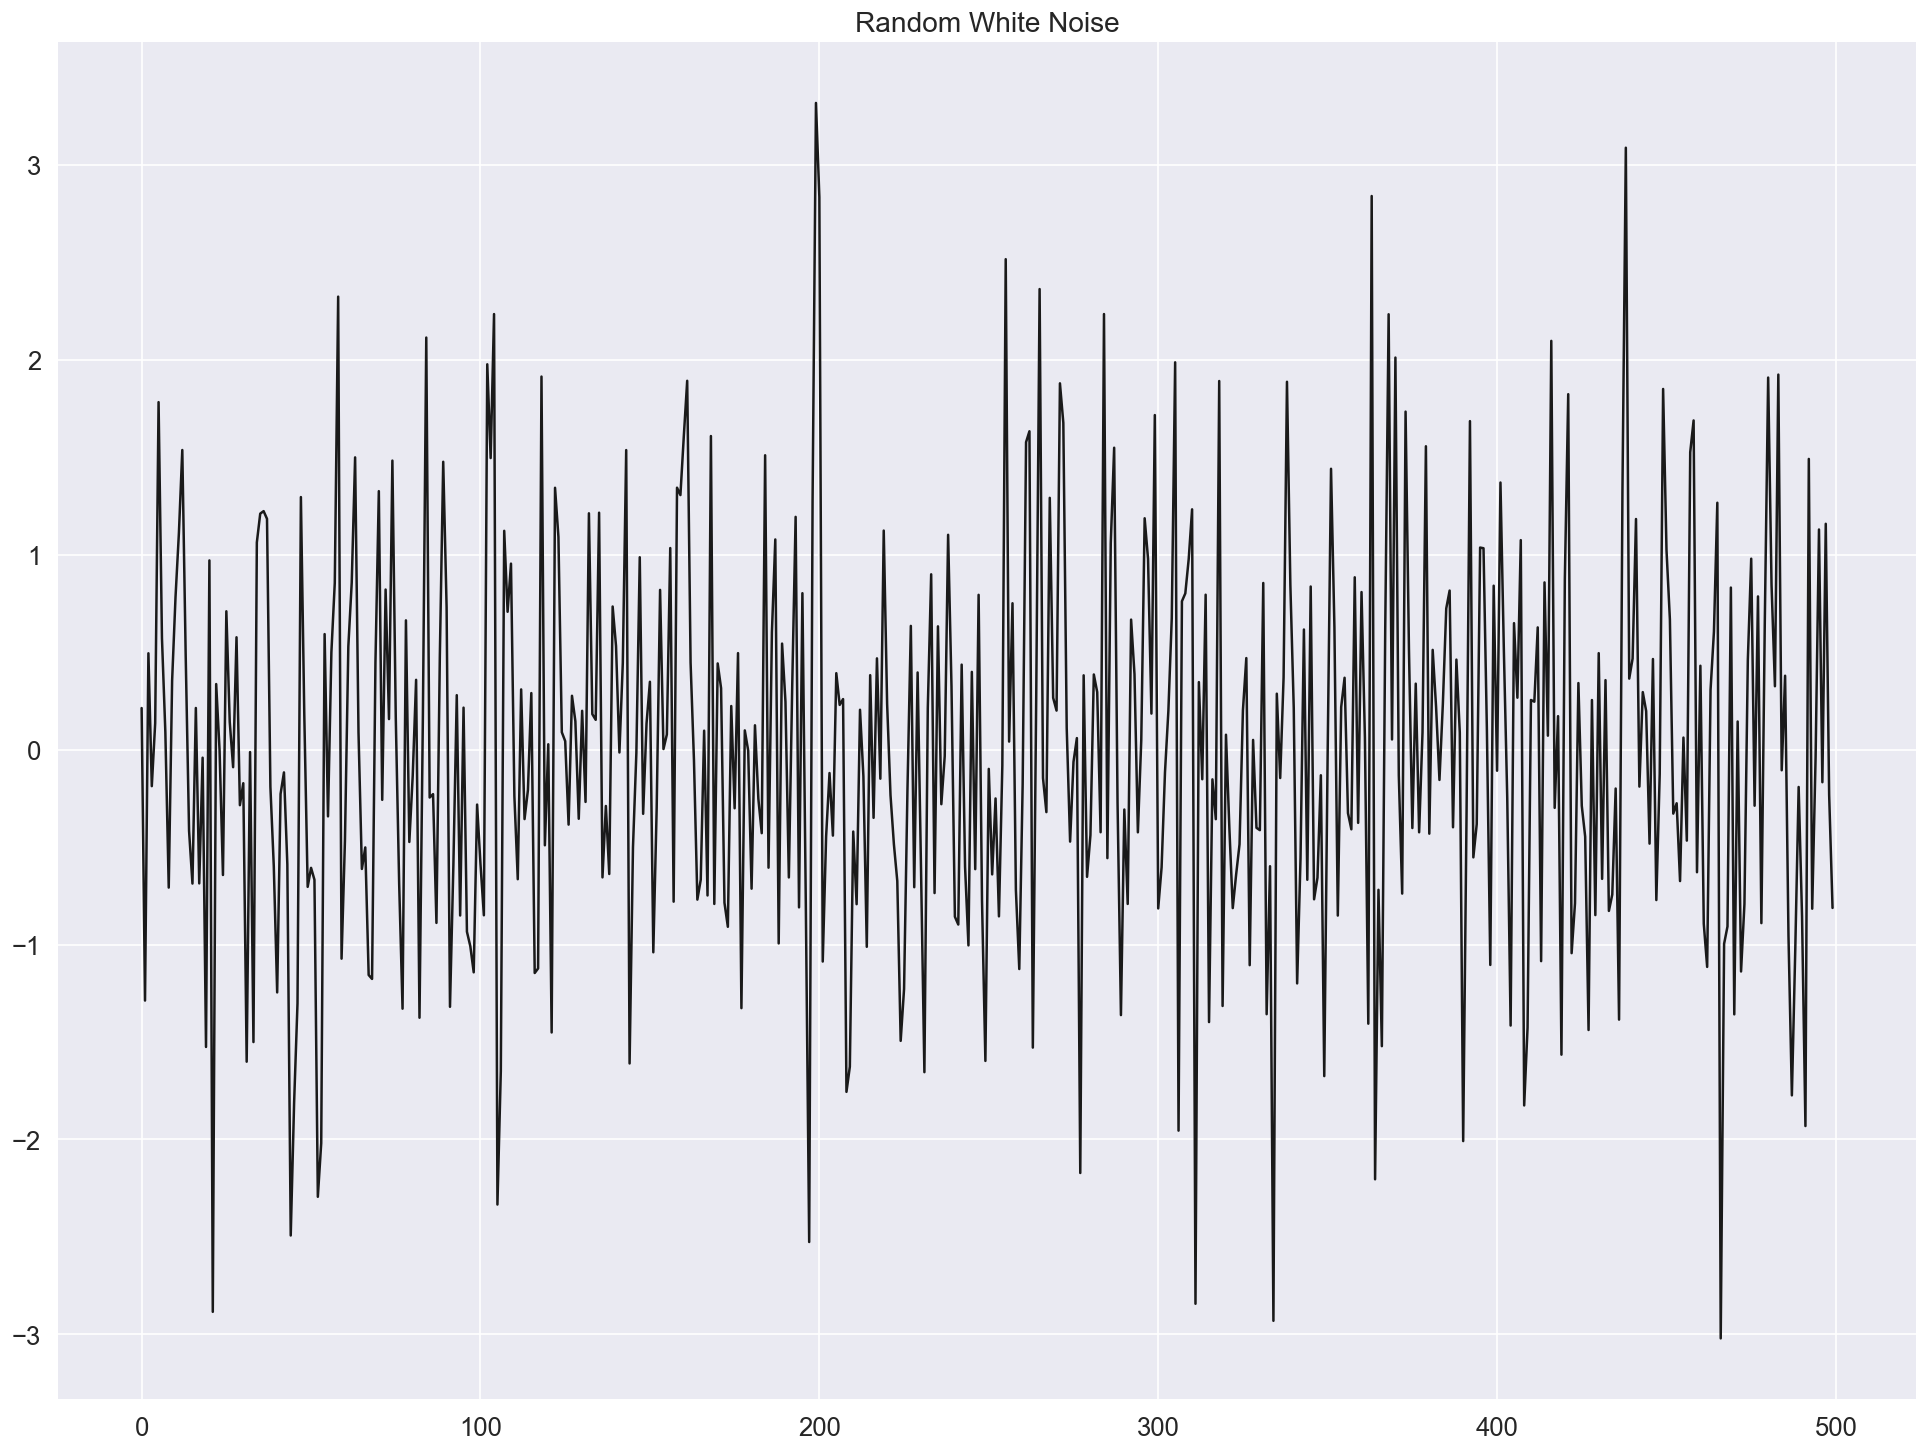

In [193]:
# Difference between white nosie and stationary series
"""Stationay series and white noise is not a function of time, i.e. its mean and variance do not chnage with time. But white
noise is completely random variable with mean of zero"""
#Below code depicts completely random numbers with zero mean i.e. white noise

rand_vals = np.random.randn(500)
pd.Series(rand_vals).plot(title='Random White Noise', color='k')